In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
df=pd.read_csv('dataset_group.csv')

In [5]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [6]:
df.shape

(20641, 3)

In [7]:
df.nunique()

Date         603
Order_id    1139
Product       37
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [10]:
df.duplicated().sum()

4730

In [11]:
df.isna().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [12]:
df['Product'] = df['Product'].str.lower()

In [13]:
df

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


In [14]:
df = df.drop(df[df.Product == 'none'].index)

In [15]:
df

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


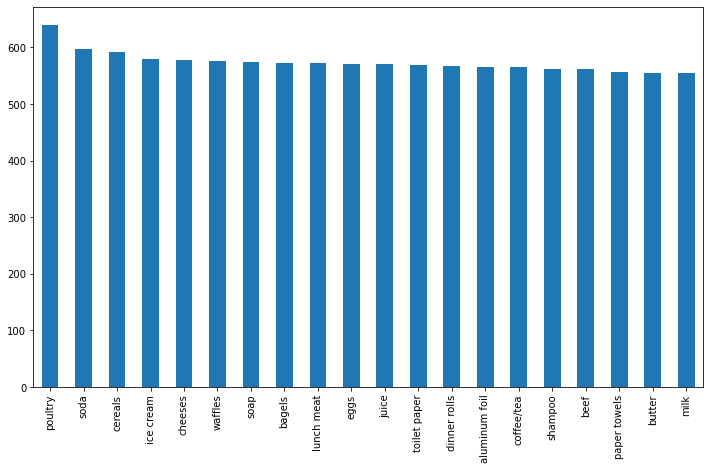

In [16]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [17]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [18]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [19]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [20]:
basket=basket.applymap(encode_zero_one)

Find the support for Products/Items using Apriori

In [21]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True, low_memory=True)

In [22]:
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
8449,0.051800,"(poultry, spaghetti sauce, ice cream, dinner r..."
8450,0.051800,"(poultry, spaghetti sauce, juice, dinner rolls)"
8451,0.053556,"(poultry, spaghetti sauce, laundry detergent, ..."
8452,0.050044,"(mixes, dishwashing liquid/detergent, laundry ..."


Visualizing the Support of Product/Itemset

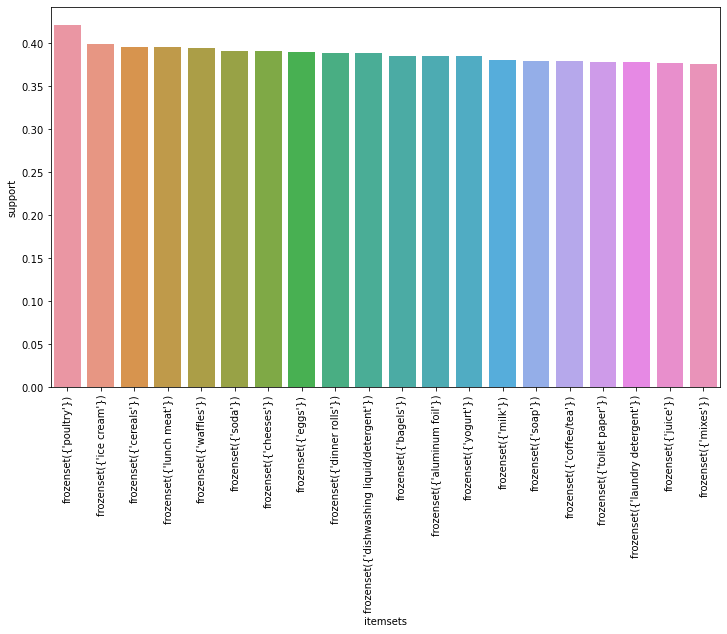

In [23]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

Check the rules using association_rules

In [24]:
basket = association_rules(itemsets, metric ="lift",) 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [31]:
basket.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47948,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
47953,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
47950,"(pasta, ice cream)","(paper towels, eggs)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
47951,"(paper towels, eggs)","(pasta, ice cream)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
47854,"(paper towels, dinner rolls)","(pasta, eggs)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
47851,"(pasta, eggs)","(paper towels, dinner rolls)",0.169447,0.155399,0.051800,0.305699,1.967185,0.025468,1.216477
47906,"(spaghetti sauce, poultry)","(juice, dinner rolls)",0.171203,0.157155,0.051800,0.302564,1.925254,0.024894,1.208490
47911,"(juice, dinner rolls)","(spaghetti sauce, poultry)",0.157155,0.171203,0.051800,0.329609,1.925254,0.024894,1.236289
47798,"(cereals, sandwich bags)","(bagels, cheeses)",0.158033,0.167691,0.050922,0.322222,1.921524,0.024421,1.227997
47795,"(bagels, cheeses)","(cereals, sandwich bags)",0.167691,0.158033,0.050922,0.303665,1.921524,0.024421,1.209140


In [32]:
basket.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12093,(beef),"(butter, laundry detergent)",0.374890,0.158033,0.051800,0.138173,0.874330,-0.007445,0.976956
12092,"(butter, laundry detergent)",(beef),0.158033,0.374890,0.051800,0.327778,0.874330,-0.007445,0.929915
24441,(coffee/tea),"(laundry detergent, ice cream)",0.379280,0.158911,0.052678,0.138889,0.874002,-0.007594,0.976748
24440,"(laundry detergent, ice cream)",(coffee/tea),0.158911,0.379280,0.052678,0.331492,0.874002,-0.007594,0.928515
46754,"(tortillas, poultry)",(waffles),0.171203,0.394205,0.058824,0.343590,0.871601,-0.008666,0.922890
46755,(waffles),"(tortillas, poultry)",0.394205,0.171203,0.058824,0.149220,0.871601,-0.008666,0.974162
34218,"(fruits, ice cream)",(pork),0.165057,0.355575,0.050922,0.308511,0.867639,-0.007768,0.931938
34223,(pork),"(fruits, ice cream)",0.355575,0.165057,0.050922,0.143210,0.867639,-0.007768,0.974501
24442,(laundry detergent),"(coffee/tea, ice cream)",0.378402,0.165057,0.052678,0.139211,0.843412,-0.009780,0.969974
24439,"(coffee/tea, ice cream)",(laundry detergent),0.165057,0.378402,0.052678,0.319149,0.843412,-0.009780,0.912972
